# Notebook Purpose
This notebook contains a handful of basic visualization about our datasette requests data. 

In [1]:
import pandas as pd

from usage_metrics.resources.postgres import get_engine

%config InlineBackend.figure_format = 'retina'

/app/.local/lib/python3.9/site-packages/dagster_pandera/__init__.py:162: ExperimentalWarning: "TableColumn" is an experimental class. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  TableColumn(
/app/.local/lib/python3.9/site-packages/dagster_pandera/__init__.py:167: ExperimentalWarning: "TableColumn" is an experimental class. It may break in future versions, even between dot releases. To mute warnings for experimental functionality, invoke warnings.filterwarnings("ignore", category=dagster.ExperimentalWarning) or use one of the other methods described at https://docs.python.org/3/library/warnings.html#describing-warning-filters.
  TableColumn(
/app/.local/lib/python3.9/site-packages/dagster_pandera/__init__.py:172: Experimenta

In [2]:
engine = get_engine()

with engine.connect() as con:
    logs = pd.read_sql_table("data_request_logs", con)

logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   insert_id                           4297 non-null   object             
 1   request_method                      4297 non-null   object             
 2   request_url                         4297 non-null   object             
 3   request_size                        4297 non-null   int64              
 4   status                              4297 non-null   int64              
 5   response_size                       4294 non-null   float64            
 6   user_agent                          4292 non-null   object             
 7   remote_ip                           4297 non-null   object             
 8   server_ip                           4297 non-null   object             
 9   referer                             817 n

## Request Volume
Number of requests for ferc1 and pudl tables and downloads per week.

<AxesSubplot:xlabel='Week', ylabel='Number of Data Requests'>

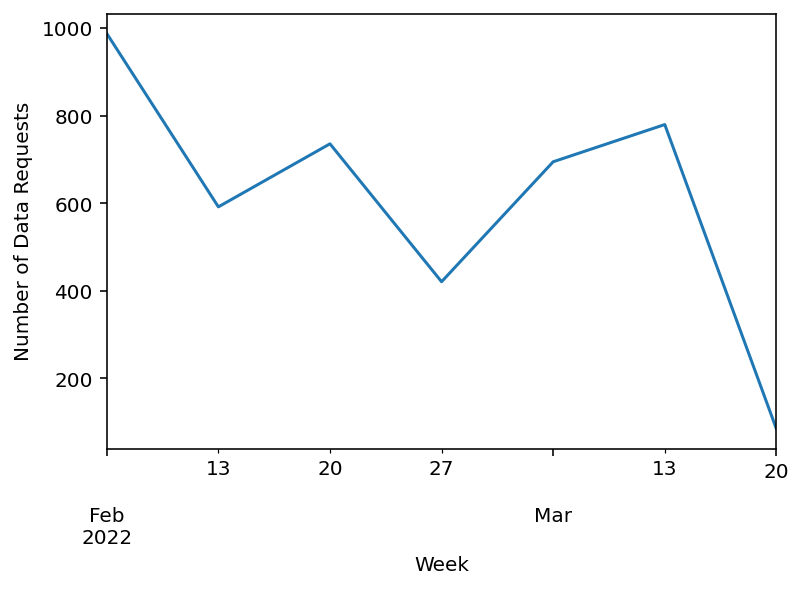

In [3]:
logs.set_index("timestamp").resample("1W").count().request_url_path.plot(xlabel="Week", ylabel="Number of Data Requests")

## Top Data Requests
The top datasette path requests. This includes json, csv and db downloads.

### Number of top data requests

<AxesSubplot:title={'center':'Requests by Data Path'}, ylabel='Number of Requests'>

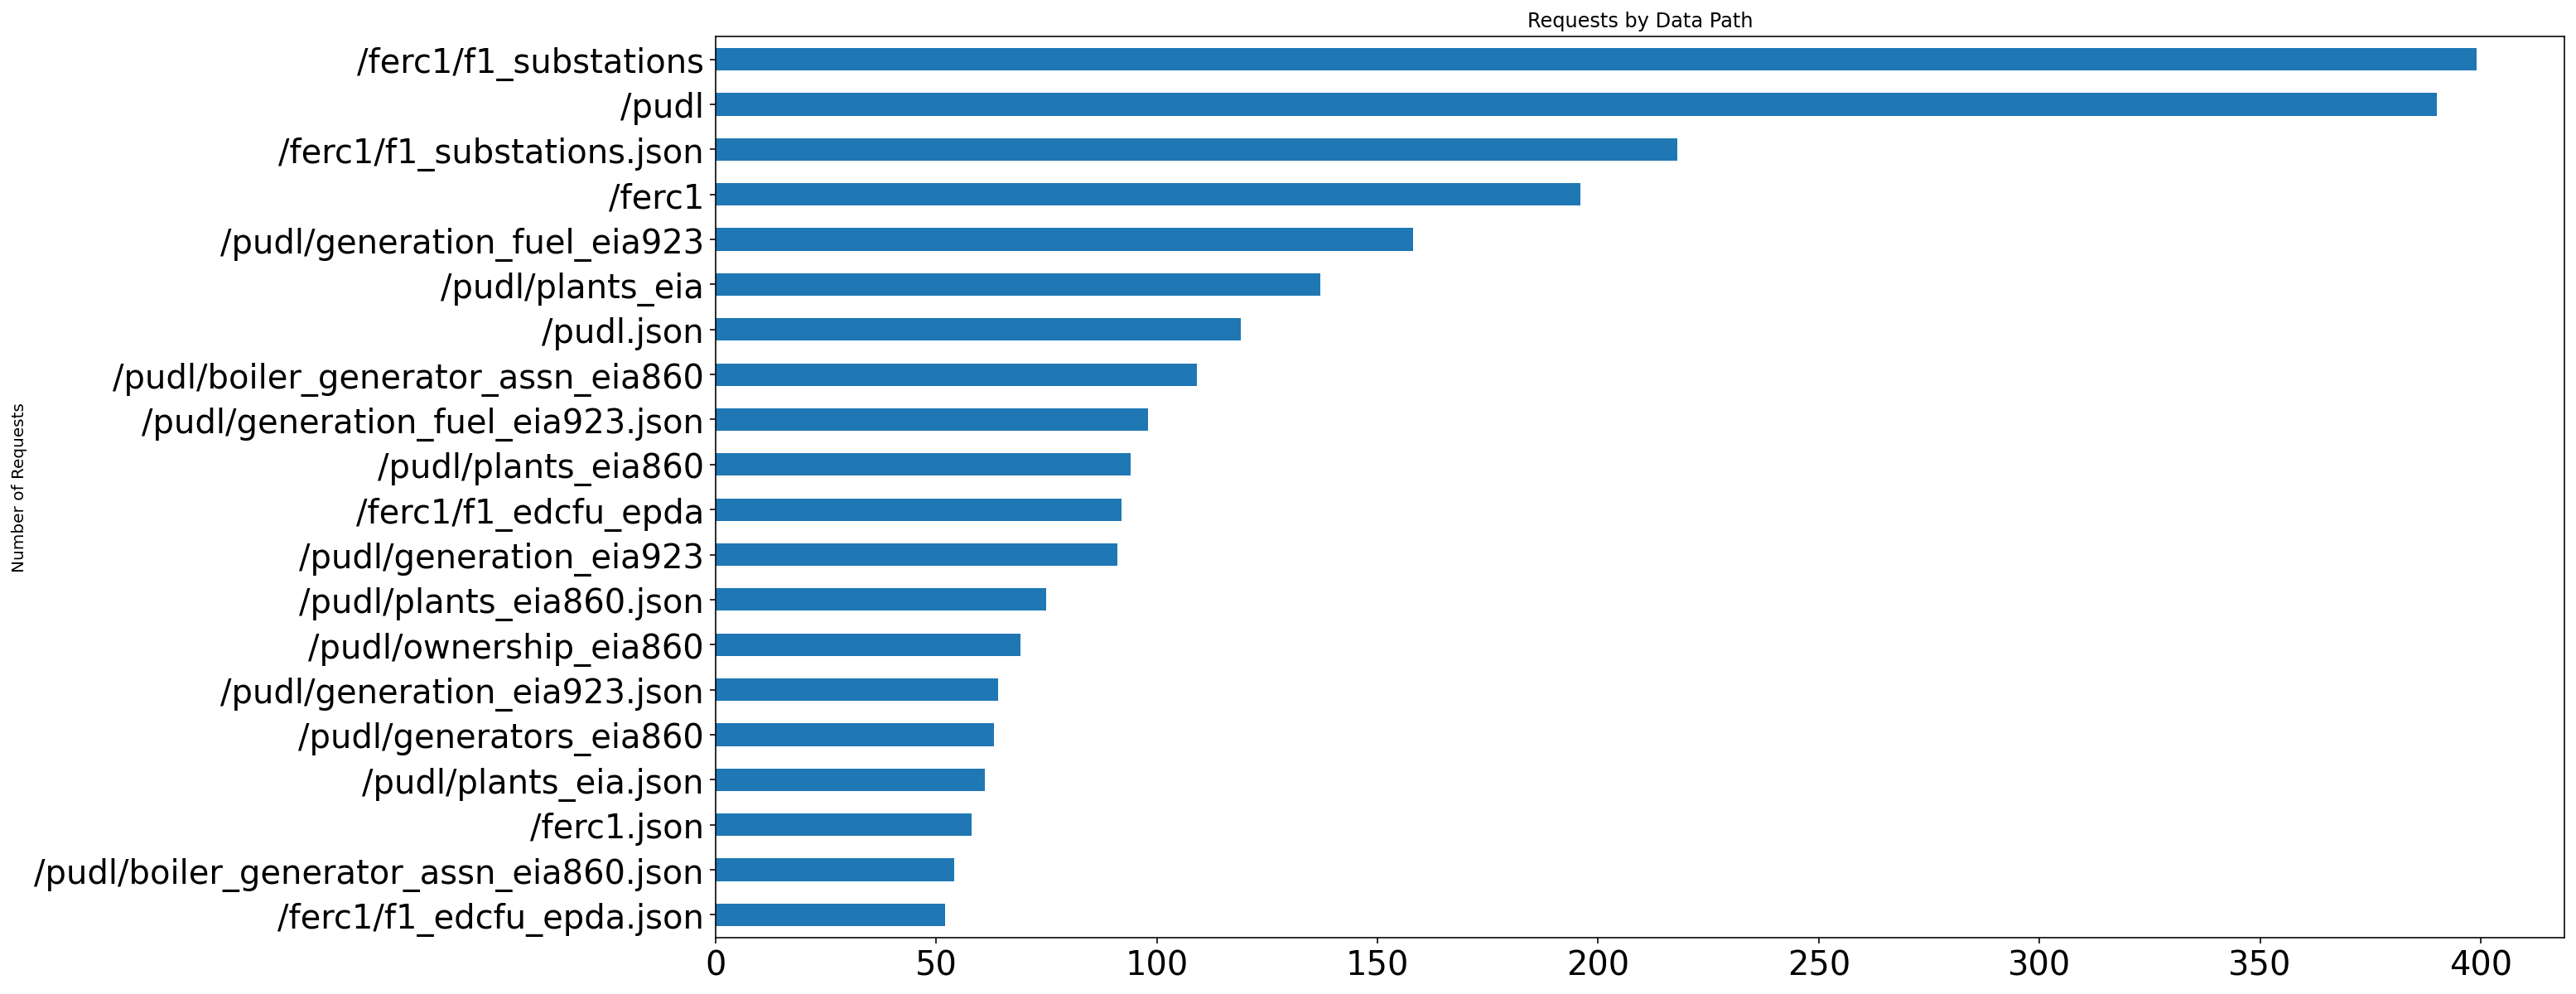

In [4]:
top_n = 20

logs.request_url_path.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Data Path")

### Percent of all requests

This chart shows 60.43751454503141 % of all data requests.


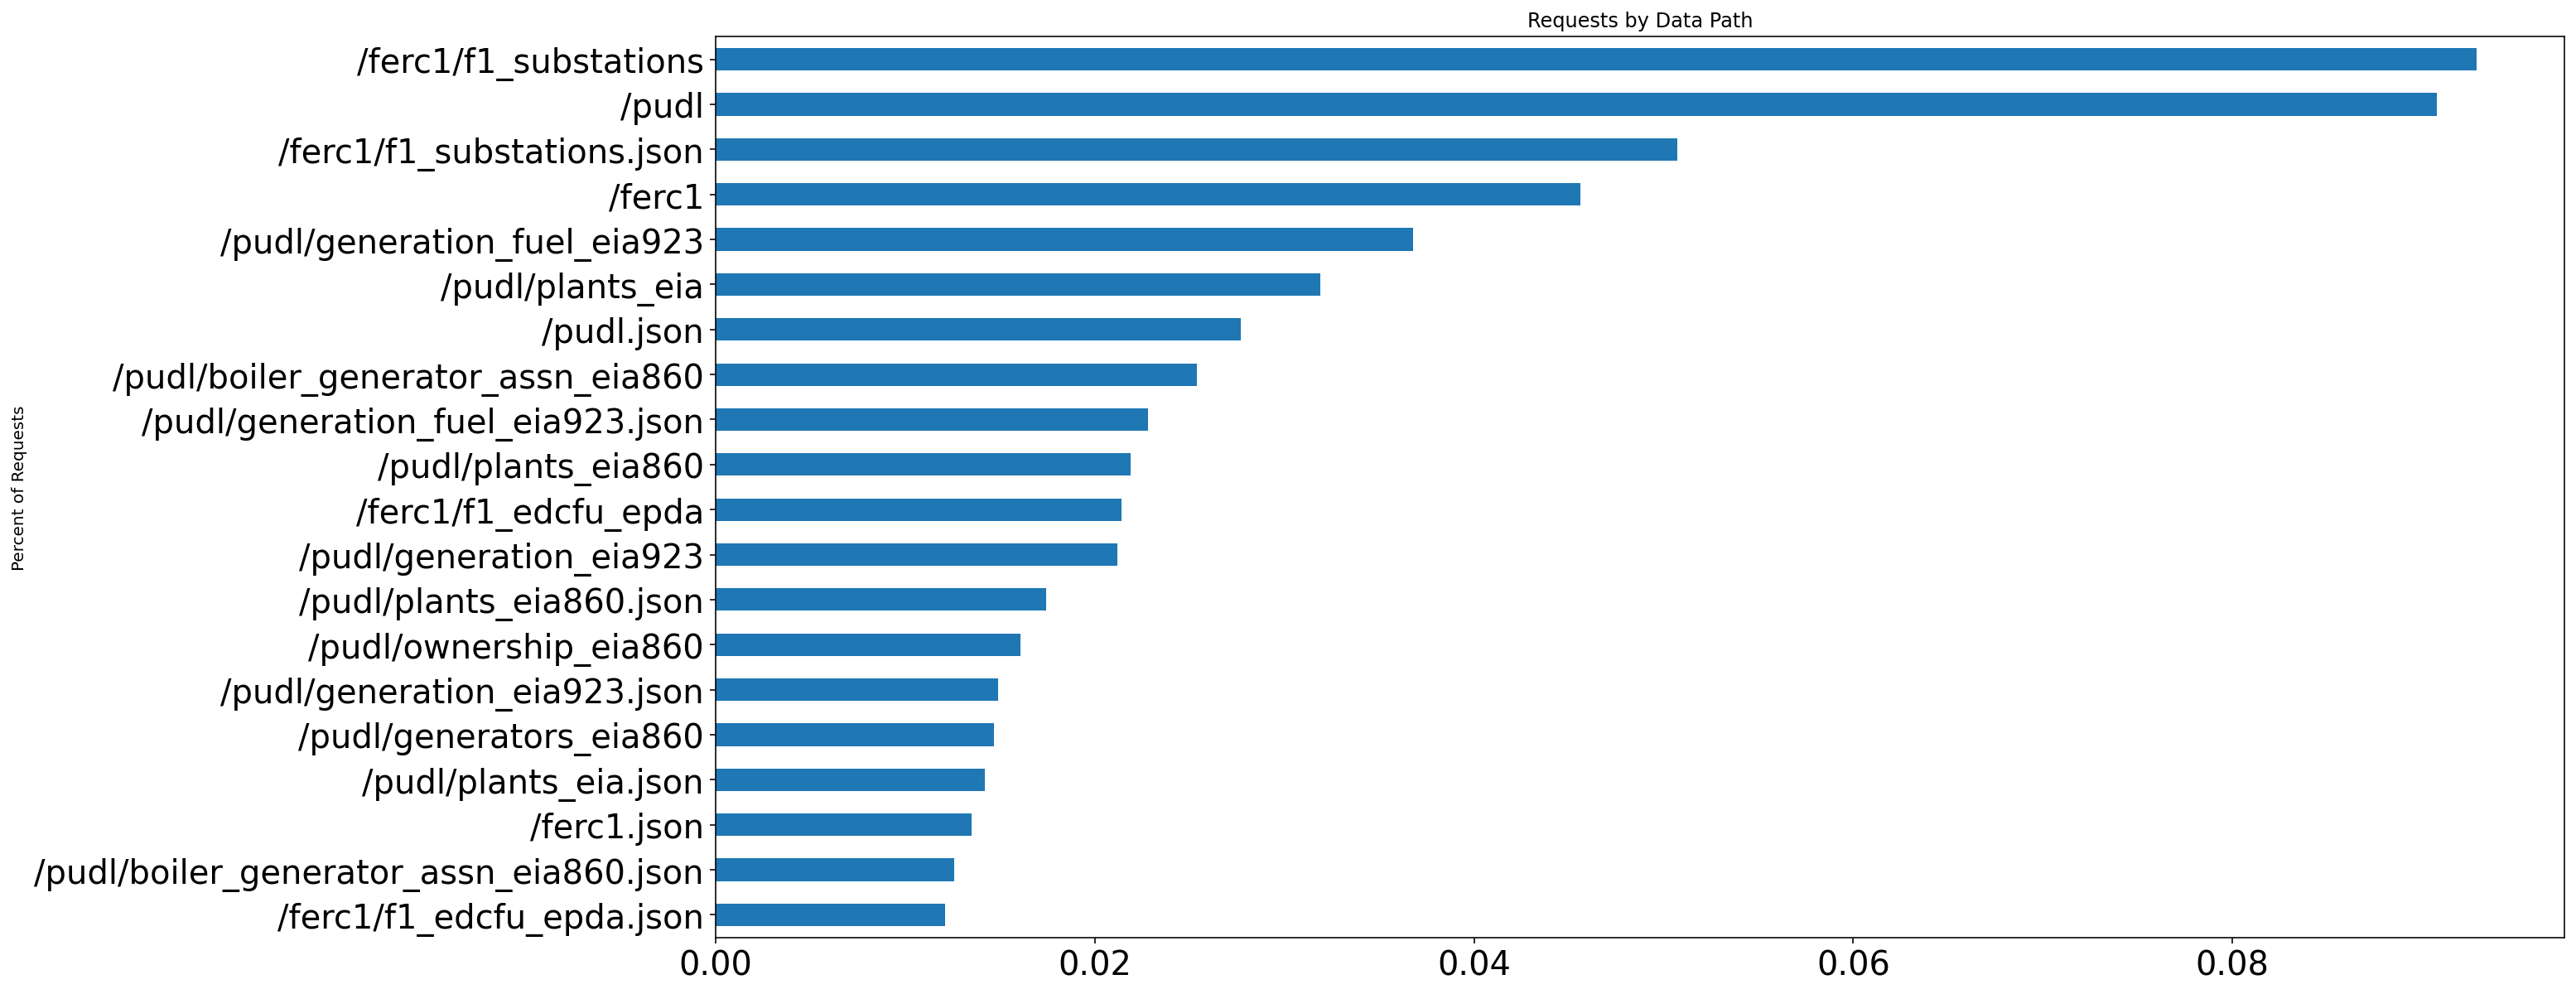

In [5]:
top_n = 20

top_paths = logs.request_url_path.value_counts(normalize=True).head(top_n)

top_paths.sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Percent of Requests", title="Requests by Data Path")

print(f"This chart shows {top_paths.sum() * 100} % of all data requests.")

## Top Organizations
Most organizations are generic internet providers however universities often have their own network set up. Unfortunately ipinfo charges for organization type so we have do some simple string filtering for now.  

<AxesSubplot:title={'center':'Requests by Academic Organization'}, ylabel='Number of Requests'>

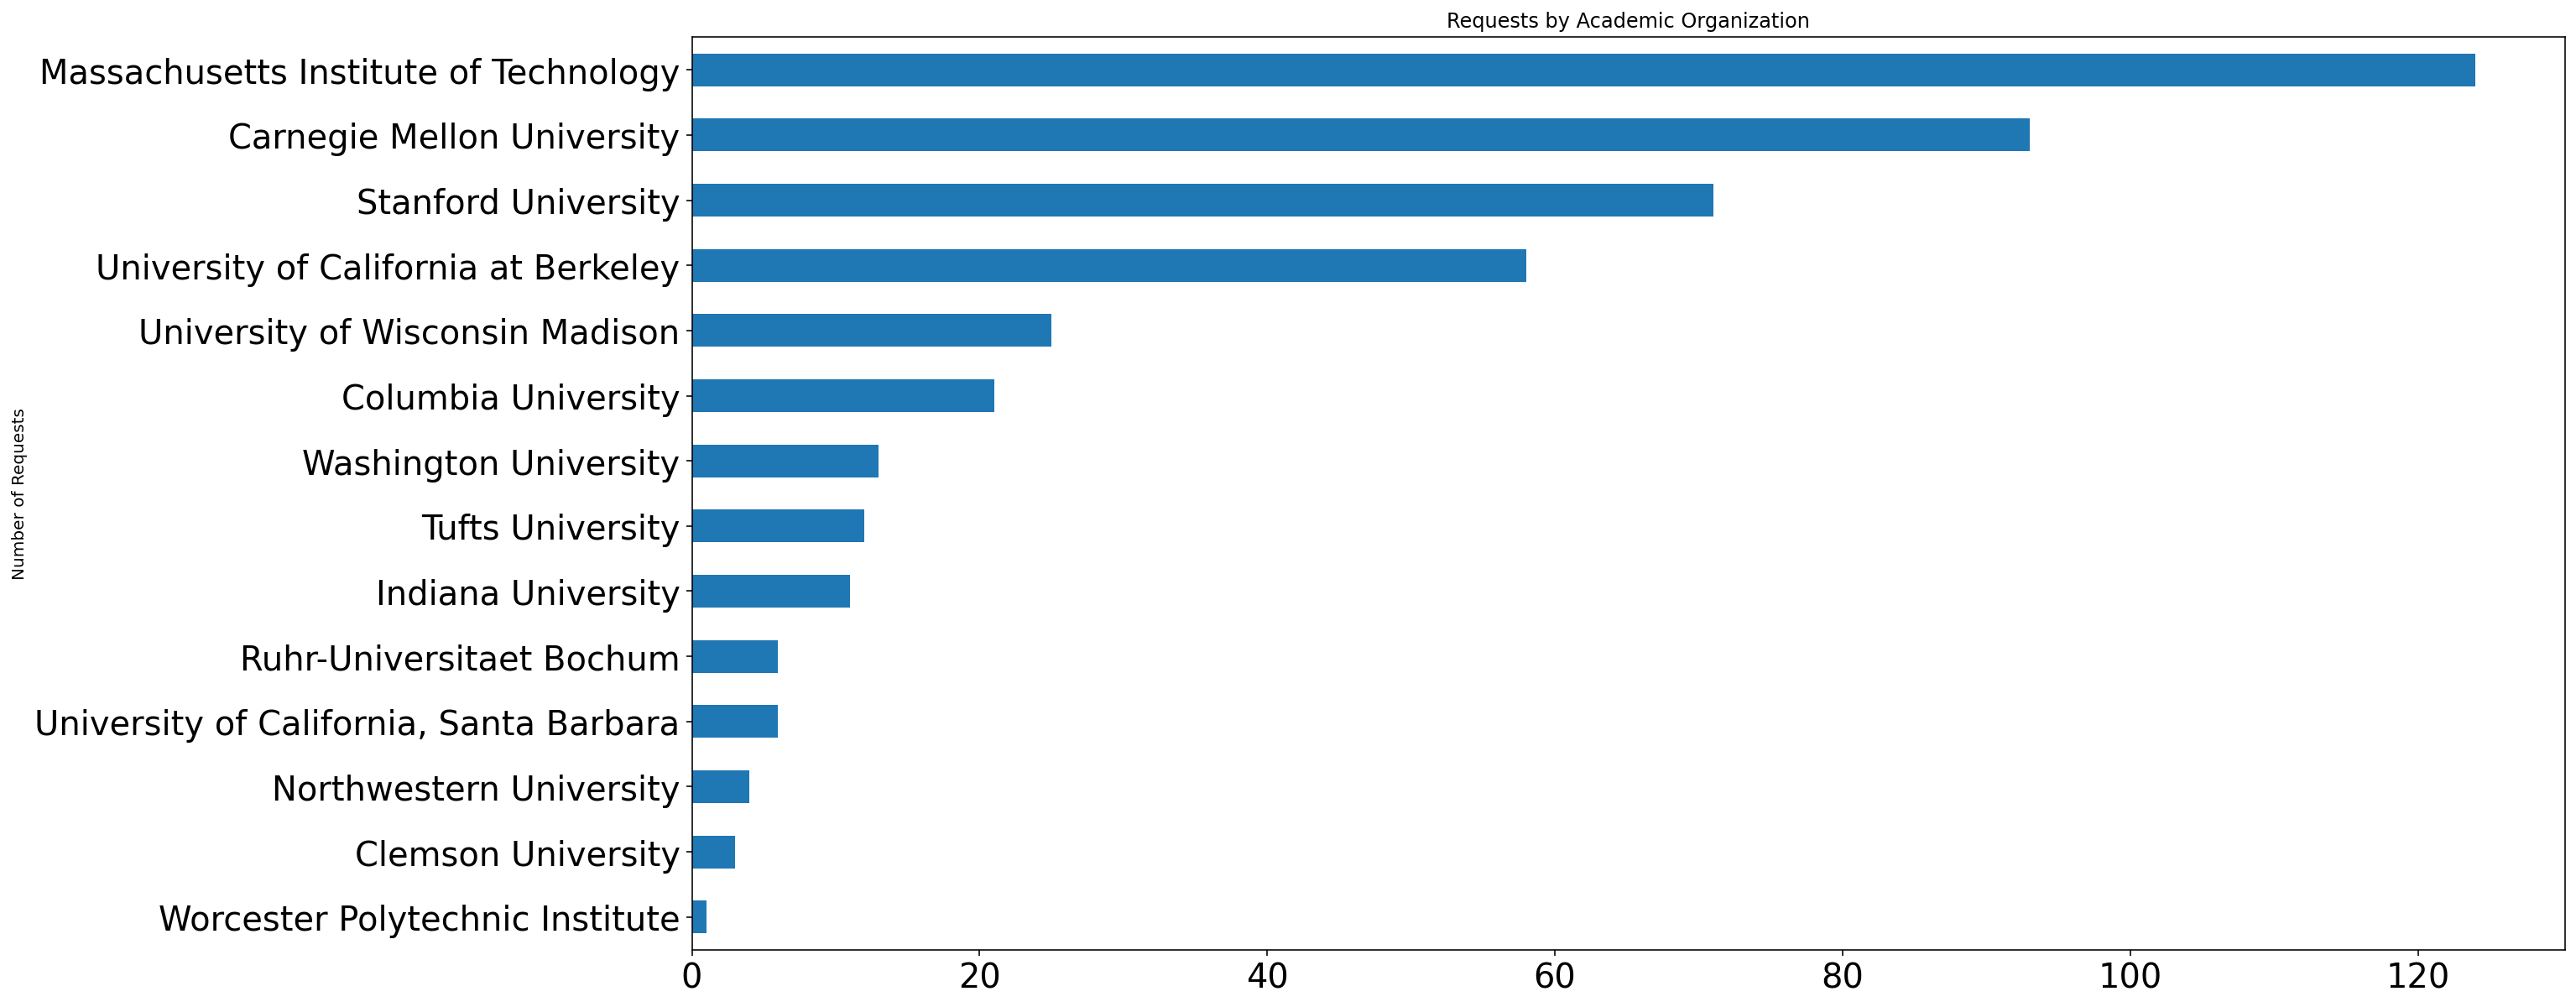

In [6]:
university_substrings = ["Universitaet", "University", "College", "Institute"]

is_uni = logs.remote_ip_org.str.contains("|".join(university_substrings))

logs[is_uni].remote_ip_org.value_counts().sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Academic Organization")

## Top Cities

<AxesSubplot:title={'center':'Requests by City'}, ylabel='Number of Requests'>

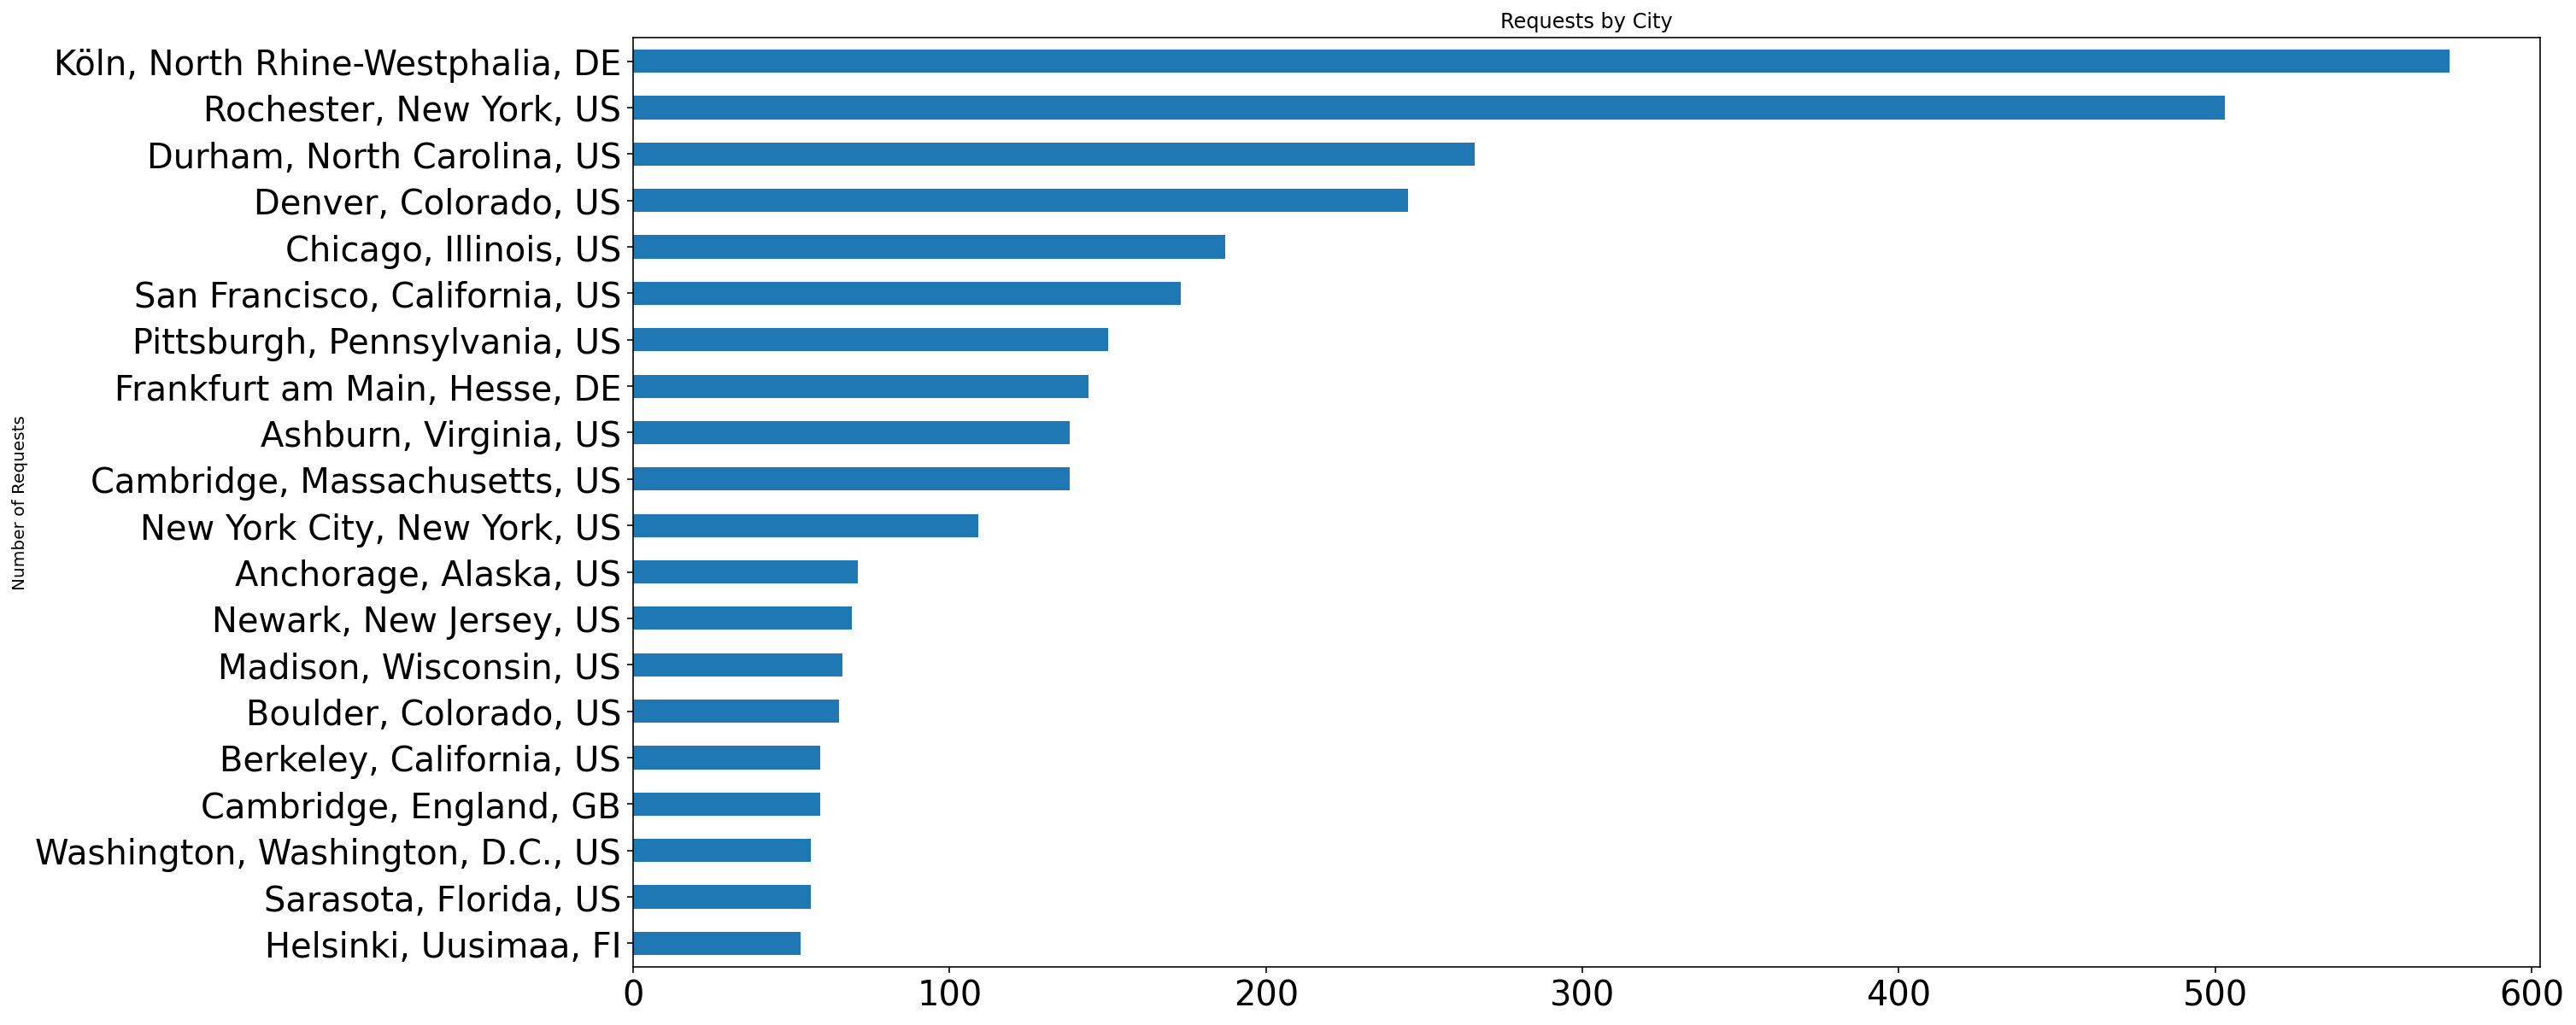

In [7]:
top_n = 20

full_location = logs.remote_ip_city + ", " + logs.remote_ip_region + ", " + logs.remote_ip_country

full_location.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by City")

## Top referers

In [11]:
logs.referer.isna().value_counts()

True     3480
False     817
Name: referer, dtype: int64

Most referers are null.

<AxesSubplot:title={'center':'Top Referers'}, ylabel='Number of Referals'>

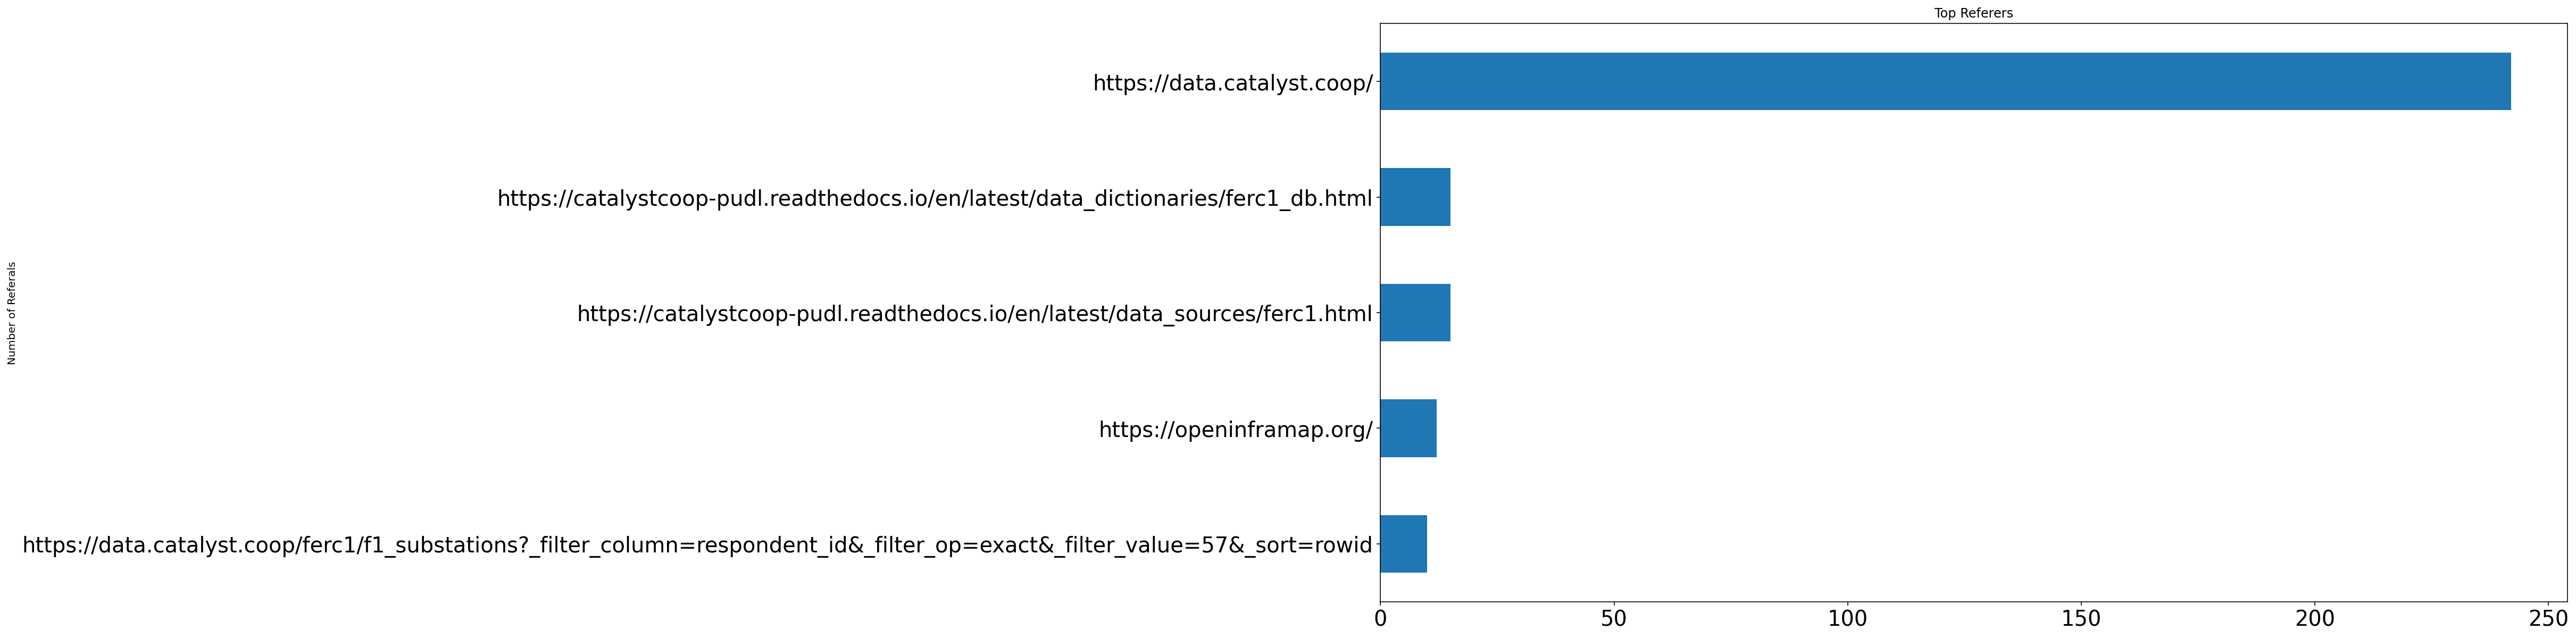

In [17]:
top_n = 5

logs.referer.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Referals", title="Top Referers")